## Bangalore house price prediction 

In [1]:
## import the Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
## read the data.

df=pd.read_csv('C:\\Users\\guess\\Desktop\\DS\\csv\\Bengaluru_House_Data.csv')

In [3]:
## observe top 5 rows of data and the shape of the data
print(df.shape)
df.head(5)


(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
## look into the information of complete data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


From the above information.
1. 6 Categorical features : bath, balcony and price
2. 3 Numerical Features : area_type, availability, location, size, society, total_sqft.
3. Price(in Lakh) is the dependent feature

In [5]:
## view the missing values in %.
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

<AxesSubplot:>

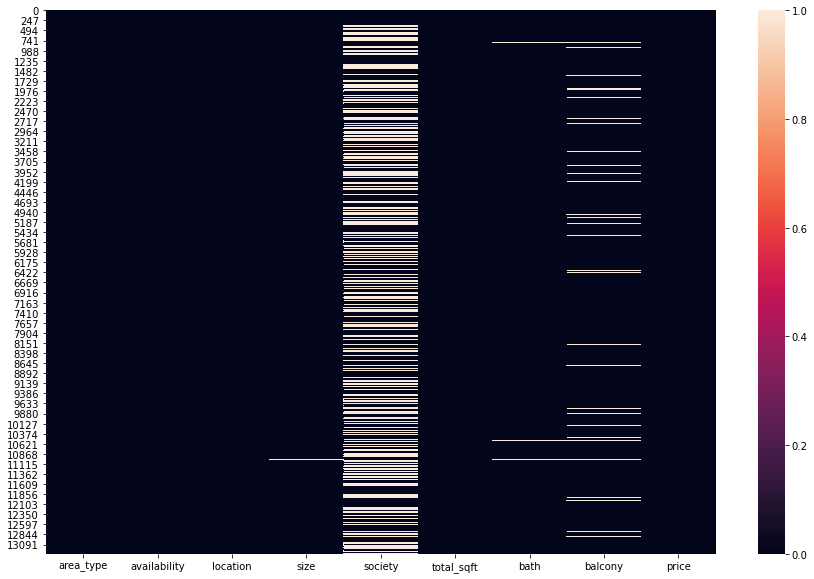

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

1. Society column has 41.3% of randomly missing values along the data. As its not the an influencing fator for the dependent variable, need to drop the entire column


2. Missing values from balcony will be replaced from its mean.


3. Since very few missing values from bath and size, preper to drop them 

In [7]:
## delete the society column from the data.

df1=df.drop('society',axis='columns')

In [8]:
## fill the Nan values of the balcony column with the mean.

df1['balcony']=df1['balcony'].fillna(df1['balcony'].mean())

In [9]:
## drop the rows with missng values.

df2=df1.dropna()

In [10]:
## verify if any missing values yet

df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [11]:
## kinds of variables with counts.

df2['total_sqft'].value_counts()

1200       843
1100       221
1500       204
2400       195
600        180
          ... 
6729         1
3950         1
3968         1
3640         1
1020.07      1
Name: total_sqft, Length: 2067, dtype: int64

In [12]:
## converting the  values into numerical type
total_sqft_int = []
for str_val in df2['total_sqft']:
  try:
    total_sqft_int.append(float(str_val)) # if '123.4' like this value in str then conver in float
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_int.append((float(temp[0])+float(temp[-1]))/2) # '123 - 534' this str value split and take mean
    except:
      total_sqft_int.append(np.nan)

In [13]:
## reset the index and jion

df2= df2.reset_index(drop=True)
df2 = df2.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))

In [14]:
size_int = []
for str_val in df2['size']:
  temp=[]
  temp = str_val.split(" ")
  try:
    size_int.append(int(temp[0]))
  except:
    size_int.append(np.nan)
    print("Noice = ",str_val)

In [15]:
## reset the index and jion.

df2 = df2.reset_index(drop=True)
df2 = df2.join(pd.DataFrame({'bhk':size_int}))

In [16]:
## observe if any missing values.

df2.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
bhk                0
dtype: int64

In [17]:
## dropping the rows of missing values.

df2 = df2.dropna()
df2.shape

(13200, 10)

Text(0.5, 1.0, 'total_sqft_int')

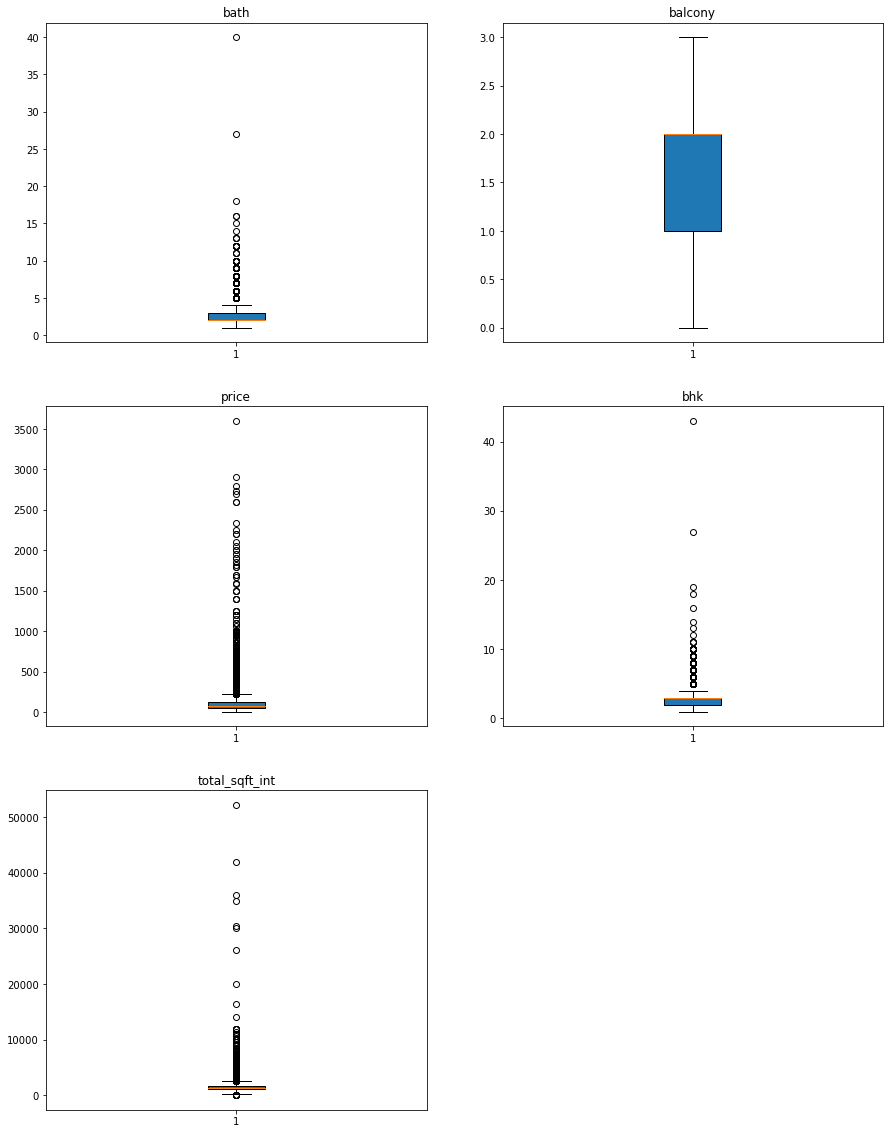

In [18]:
## to detect the outlier, plot box plot.

plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
plt.boxplot(df2['bath'],patch_artist=True)
plt.title('bath')
plt.subplot(3,2,2)
plt.boxplot(df2['balcony'],patch_artist=True)
plt.title('balcony')
plt.subplot(3,2,3)
plt.boxplot(df2['price'],patch_artist=True)
plt.title('price')
plt.subplot(3,2,4)
plt.boxplot(df2['bhk'],patch_artist=True)
plt.title('bhk')
plt.subplot(3,2,5)
plt.boxplot(df2['total_sqft_int'],patch_artist=True)
plt.title('total_sqft_int')



from the above observation, except balcony all the other features have outliers 

In [19]:
##  detect outliers from feature total_sqft_int.

df2[df2['total_sqft_int']/df2['bhk'] < 350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [20]:
## Delete outliers from the feature total_sqft_int.

df3 = df2[~(df2['total_sqft_int']/df2['bhk'] < 350)]
df3.shape

(12106, 10)

In [21]:
## similarly for feature price_per_sqft.

df3['price_per_sqft'] = df2['price']*100000 / df2['total_sqft_int']  
df3.head()

<ipython-input-21-c2dfb5484188>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['price_per_sqft'] = df2['price']*100000 / df2['total_sqft_int']


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [22]:
## oberve the outliers of feature price_per_sqft to clean it.

df3.price_per_sqft.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [23]:
## using above obervation, Removing outliers using help of 'price per sqrt'  taking std and mean per location.

def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out

In [24]:
df3 = remove_pps_outliers(df3)
df3.shape

(8888, 11)

In [25]:
## to understand the outliers of feature size, plot bhk wrt sqft.

def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

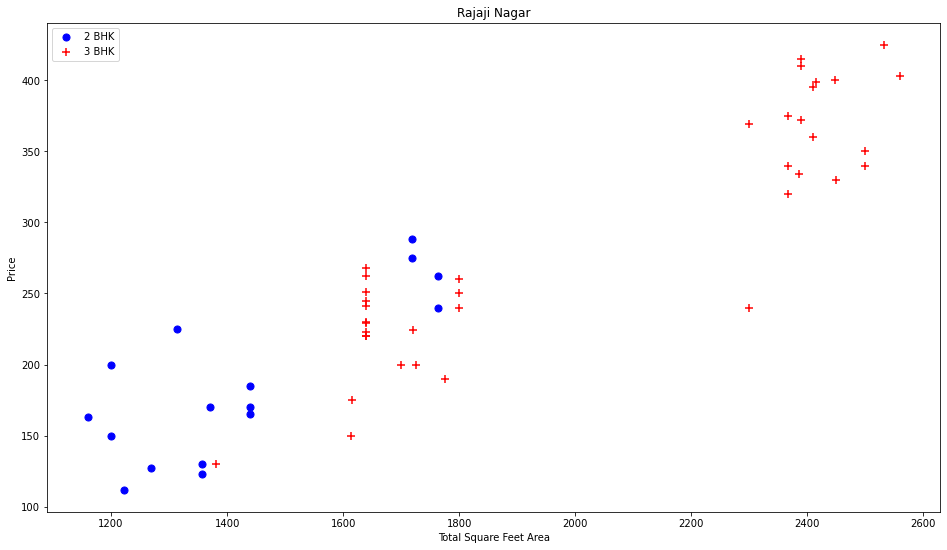

In [26]:
plot_scatter_chart(df3, "Rajaji Nagar")

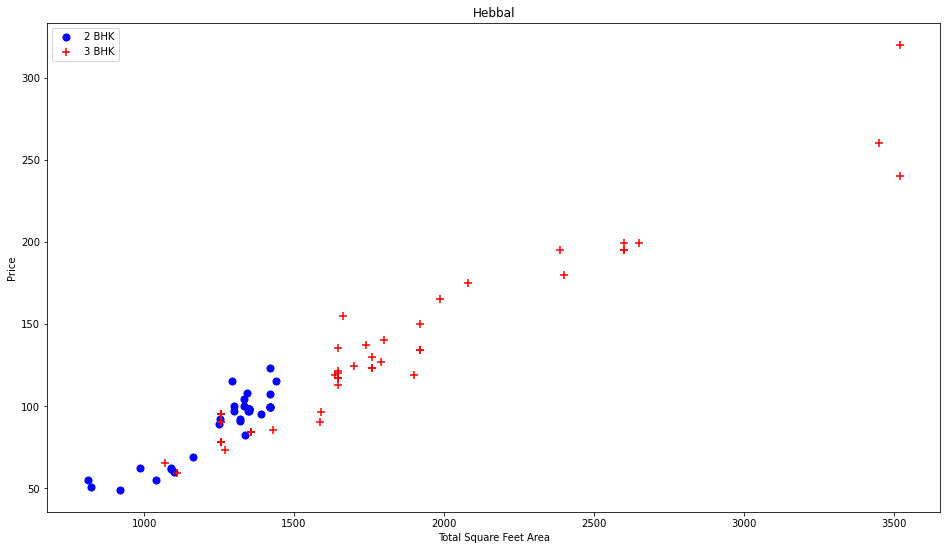

In [27]:
plot_scatter_chart(df3, "Hebbal")

in above scatterplots we observe that at same location price of 2 bhk house is greater than 3 bhk so it is outlier

In [28]:
## using above obervation, Removing outliers of 'bhk'.

def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

In [29]:
df3 = remove_bhk_outliers(df3)
df3.shape

(7194, 11)

In [30]:
##here we are considering data only total no. bathroom =  bhk + 1.

df3[df3.bath > df3.bhk+2].bath.unique()

array([7., 8., 9., 6.])

In [31]:
## Features having outliers of bathroom.

df3[df3.bath > df3.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
1861,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
5836,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
7098,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
7569,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330


In [32]:
## removing outliers of feature bathroom.

df3 = df3[df3.bath < df3.bhk+2]
df3.shape

(7120, 11)

In [33]:
num_var = ["bath","balcony","total_sqft_int","bhk","price"]

C:\Users\guess\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guess\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guess\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guess\anaconda3\lib\si

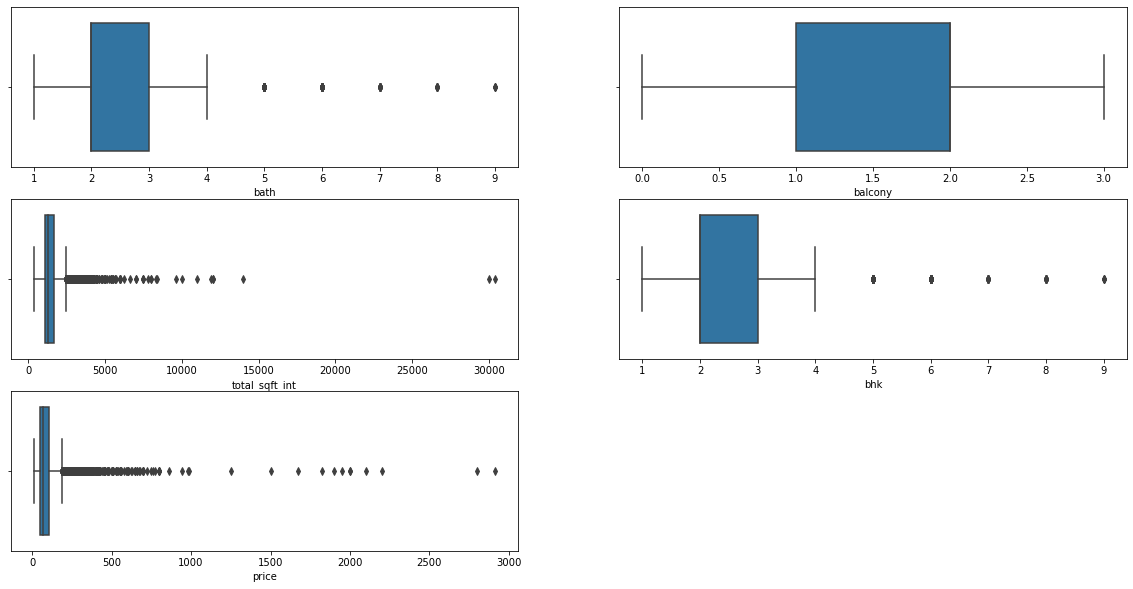

In [34]:
plt.figure(figsize=(20,10))
for i,var in enumerate(num_var):
  plt.subplot(3,2,i+1)
  sns.boxplot(df3[var])

Extreme outliers haVE been removed from the data. Yet many outliers exists, will be proceeding with this.

In [35]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667


In [36]:
## performing one hot encoding to feature area_type

dfal=pd.get_dummies(df3[['area_type']],drop_first=True)
df3.shape

(7120, 11)

In [37]:
## concating it.

df3=pd.concat([df3,dfal],axis=True)

In [38]:
## similerly performing one hot encoding to feature availability.

df3["availability_Ready To Move"] = np.where(df3["availability"]=="Ready To Move",1,0)
df3.shape

(7120, 15)

In [39]:
## performing labele  encoding to feature location.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df3['location']= le.fit_transform(df3['location'])


In [40]:
df3.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move
0,Super built-up Area,Ready To Move,0,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866,0,0,1,1
1,Built-up Area,Ready To Move,0,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714,0,0,0,1
2,Super built-up Area,Ready To Move,0,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571,0,0,1,1
4,Super built-up Area,Ready To Move,1,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000,0,0,1,1
5,Plot Area,Ready To Move,1,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667,0,1,0,1


In [41]:
## to drop the encoded features. 
df3.drop(['area_type','availability','total_sqft','size'],axis=1,inplace=True)

In [42]:
df3[['bath','balcony','price','total_sqft_int','price','price_per_sqft']]=df3[['bath','balcony','price','total_sqft_int','price','price_per_sqft']].astype(int)

In [43]:
print(df3.shape)
df3.head(5)

(7120, 11)


,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move
0,0,3,2,150,1672,3,8971,0,0,1,1
1,0,3,3,149,1750,3,8514,0,0,0,1
2,0,3,2,150,1750,3,8571,0,0,1,1
4,1,2,2,40,1250,2,3200,0,0,1,1
5,1,2,2,83,1200,2,6916,0,1,0,1


In [44]:
## assigning Features to X and y.

X=df3.drop(['price'],axis=1)
y=df3[['price']]

In [45]:
print(X.shape)
y.shape

(7120, 10)


(7120, 1)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

## Linear Regression , Ridge Regression and Lasso Regression

In [48]:
## import LinearRegression, Lasso, Ridge from sklearn linear model.

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [49]:
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [50]:
## fit and run linear regression.

lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) # with all num var 0.7842744111909903
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(0.7818287298925781, 66.22701001130378)

In [51]:
y_pred = lr.predict(X_test)

In [52]:
## fit and run ridge.

lr_ridge.fit(X_train, y_train)
lr_ridge_score=lr_ridge.score(X_test, y_test) # with balcony 0.5162364637824872
lr_ridge_rmse = rmse(y_test, lr_ridge.predict(X_test))
lr_ridge_score, lr_ridge_rmse

(0.7820152778772891, 66.1986901566415)

In [53]:
y_pred = lr_ridge.predict(X_test)

In [54]:
## fit and run lasso. 

lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test) # with balcony 0.5162364637824872
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

(0.8011542273291691, 63.22583148665581)

In [55]:
y_pred = lr_ridge.predict(X_test)

## Random forest

In [56]:
## import random forest from sklearn ensemble

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test) # with 0.8863376025408044
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score, rfr_rmse

<ipython-input-56-5a8a4247906d>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train,y_train)


(0.8811904329217416, 48.87222087293718)

In [57]:
y_pred = rfr.predict(X_test)

In [58]:
## import xgboost.

import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg_score=xgb_reg.score(X_test,y_test) # with 0.8838865742273464
xgb_reg_rmse = rmse(y_test, xgb_reg.predict(X_test))
xgb_reg_score, xgb_reg_rmse

(0.895275769500326, 45.883861178384755)

In [59]:
## print all the model scores and RSME to compare and choose.

print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score, "RMSE":lr_rmse}, 
              {'Model': 'Ridge','Score':lr_ridge_score, "RMSE":lr_ridge_rmse},      
              {'Model': 'Lasso','Score':lr_lasso_score, "RMSE":lr_lasso_rmse},
              {'Model': 'Random Forest','Score':rfr_score, "RMSE":rfr_rmse},
              {'Model': 'XGBoost','Score':xgb_reg_score, "RMSE":xgb_reg_rmse}],
             columns=['Model','Score','RMSE']))

               Model     Score       RMSE
0  Linear Regression  0.781829  66.227010
1              Ridge  0.782015  66.198690
2              Lasso  0.801154  63.225831
3      Random Forest  0.881190  48.872221
4            XGBoost  0.895276  45.883861


from  the above observation, xgboost performs best for the data.

In [60]:
## import cross validations from sklearn

from sklearn.model_selection import KFold,cross_val_score
cvs = cross_val_score(xgb_reg, X_train,y_train, cv = 10)
cvs,cvs.mean()

(array([0.99201858, 0.98684002, 0.99689777, 0.98430731, 0.97638103,
        0.99381241, 0.97191946, 0.95505886, 0.9938634 , 0.98572394]),
 0.9836822791138589)

In [61]:
cvs_rfr = cross_val_score(rfr, X_train,y_train, cv = 10)
cvs_rfr, cvs_rfr.mean() 

C:\Users\guess\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\guess\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\guess\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\guess\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

(array([0.99083807, 0.96162427, 0.99644935, 0.96449016, 0.96193141,
        0.93735128, 0.95013644, 0.91682175, 0.99704158, 0.98570763]),
 0.9662391928285607)

In [62]:
## cross validation for random forest.
from sklearn.model_selection import cross_val_score
cvs_rfr2 = cross_val_score(RandomForestRegressor(), X_train,y_train, cv = 10)
cvs_rfr2, cvs_rfr2.mean()

C:\Users\guess\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\guess\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\guess\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\guess\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

(array([0.99249812, 0.97227285, 0.9959849 , 0.98237942, 0.96308554,
        0.95549949, 0.9420672 , 0.90980608, 0.99615876, 0.98713954]),
 0.9696891892166677)

In [63]:
## import hyper parameter tuning.

from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor

In [64]:
## defining different parameters  to increase the accuracy of the model.

xgb1 = XGBRegressor()
parameters = {'learning_rate': [0.1,0.03, 0.05, 0.07], #so called `eta` value, # [default=0.3] Analogous to learning rate in GBM
              'min_child_weight': [1,3,5], #[default=1] Defines the minimum sum of weights of all observations required in a child.
              'max_depth': [4, 6, 8], #[default=6] The maximum depth of a tree,
              'gamma':[0,0.1,0.001,0.2], #Gamma specifies the minimum loss reduction required to make a split.
              'subsample': [0.7,1,1.5], #Denotes the fraction of observations to be randomly samples for each tree.
              'colsample_bytree': [0.7,1,1.5], #Denotes the fraction of columns to be randomly samples for each tree.
              'objective':['reg:linear'], #This defines the loss function to be minimized.
 
              'n_estimators': [100,300,500]}
 
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_score_) # 0.9397345161940295
print(xgb_grid.best_params_)

Fitting 2 folds for each of 3888 candidates, totalling 7776 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 7776 out of 7776 | elapsed: 33.0min finished


[14:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
0.9549346096808842
{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 500, 'objective': 'reg:linear', 'subsample': 0.7}


In [65]:
xgb_tune = xgb_grid.estimator
cvs = cross_val_score(xgb_tune, X_train,y_train, cv = 10)
cvs, cvs.mean()

(array([0.99201858, 0.98684002, 0.99689777, 0.98430731, 0.97638103,
        0.99381241, 0.97191946, 0.95505886, 0.9938634 , 0.98572394]),
 0.9836822791138589)

In [66]:
[i/10.0 for i in range(1,6)]
 
#xgb_grid.estimator
 
xgb_tune2 =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.6, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_tune2.fit(X_train,y_train) # 0.9412851220926807
xgb_tune2.score(X_test,y_test)

[14:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


0.8923409119032885

In [67]:
parameters = {'learning_rate': [0.1,0.03, 0.05, 0.07], #so called `eta` value, # [default=0.3] Analogous to learning rate in GBM
              'min_child_weight': [1,3,5], #[default=1] Defines the minimum sum of weights of all observations required in a child.
              'max_depth': [4, 6, 8], #[default=6] The maximum depth of a tree,
              'gamma':[0,0.1,0.001,0.2], #Gamma specifies the minimum loss reduction required to make a split.
              'subsample': [0.7,1,1.5], #Denotes the fraction of observations to be randomly samples for each tree.
              'colsample_bytree': [0.7,1,1.5], #Denotes the fraction of columns to be randomly samples for each tree.
              'objective':['reg:linear'], #This defines the loss function to be minimized.
              'n_estimators': [100,300,500]}

In [68]:
xgb_tune2 =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.9, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_tune2.fit(X_train,y_train) # 0.9412851220926807
xgb_tune2.score(X_test,y_test)

[14:01:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


0.8855620488453058

In [69]:
cvs = cross_val_score(xgb_tune2, X_train,y_train, cv = 5)
cvs, cvs.mean()

[14:01:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:01:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:01:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


(array([0.97778422, 0.98446589, 0.97576177, 0.9029364 , 0.96597892]),
 0.9613854365753317)

In [70]:
np.sqrt(mean_squared_error(y_test, xgb_tune2.predict(X_test)))

47.96466384123255